In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler



In [2]:
df = pd.read_excel("heatex_data.xlsx")

In [3]:
df

,Temp of Hot Fluid Inlet (°C),Temp of Hot Fluid Outlet (°C),Temp of Cold Fluid Inlet (°C),Temp of Cold Fluid Outlet (°C),LMTD (°C),Heat Load (kW),Mass Flow Rate of Hot Fluid (kg/s),Mass Flow Rate of Cold Fluid (kg/s),Overall Heat Transfer Coefficient (W/m²K),Heat Transfer Area (m²),Pressure Drop (kPa)
0,30,120,-10,20,51,20,0.5,1.0,450,50,10
1,35,140,-8,25,56,25,0.6,1.2,520,60,12
2,40,160,-6,30,61,30,0.7,1.5,590,70,14
3,45,180,-4,35,66,35,0.8,1.8,660,80,16
4,50,200,-2,40,70,40,0.9,2.0,730,90,18
...,...,...,...,...,...,...,...,...,...,...,...
127,50,210,-9,29,59,34,0.6,1.3,630,55,12
128,60,190,-4,18,40,11,0.2,0.7,410,25,5
129,35,240,-6,28,64,49,1.1,2.2,710,85,18
130,45,220,-10,35,65,63,1.4,2.8,800,130,26


In [4]:
# print the shape of the data
print("Shape of the data: ", df.shape)

# print the column names
print("Column names: ", list(df.columns))

# print the data types of each column
print("Data types: ")
print(df.dtypes)



Shape of the data:  (132, 11)
Column names:  ['Temp of Hot Fluid Inlet (°C)', 'Temp of Hot Fluid Outlet (°C)', 'Temp of Cold Fluid Inlet (°C)', 'Temp of Cold Fluid Outlet (°C)', 'LMTD (°C)', 'Heat Load (kW)', 'Mass Flow Rate of Hot Fluid (kg/s)', 'Mass Flow Rate of Cold Fluid (kg/s)', 'Overall Heat Transfer Coefficient (W/m²K)', 'Heat Transfer Area (m²)', 'Pressure Drop (kPa)']
Data types: 
Temp of Hot Fluid Inlet (°C)                   int64
Temp of Hot Fluid Outlet (°C)                  int64
Temp of Cold Fluid Inlet (°C)                  int64
Temp of Cold Fluid Outlet (°C)                 int64
LMTD (°C)                                      int64
Heat Load (kW)                                 int64
Mass Flow Rate of Hot Fluid (kg/s)           float64
Mass Flow Rate of Cold Fluid (kg/s)          float64
Overall Heat Transfer Coefficient (W/m²K)      int64
Heat Transfer Area (m²)                        int64
Pressure Drop (kPa)                            int64
dtype: object


In [5]:
# print summary statistics for numeric columns
print("Summary statistics: ")
print(df.describe())

Summary statistics: 
       Temp of Hot Fluid Inlet (°C)  Temp of Hot Fluid Outlet (°C)  \
count                    132.000000                     132.000000   
mean                      48.977273                     199.696970   
std                        8.415241                      47.240483   
min                       30.000000                     110.000000   
25%                       45.000000                     170.000000   
50%                       50.000000                     195.000000   
75%                       55.000000                     230.000000   
max                       65.000000                     306.000000   

       Temp of Cold Fluid Inlet (°C)  Temp of Cold Fluid Outlet (°C)  \
count                     132.000000                      132.000000   
mean                       -5.628788                       25.704545   
std                         2.925031                        7.139545   
min                       -10.000000                       1

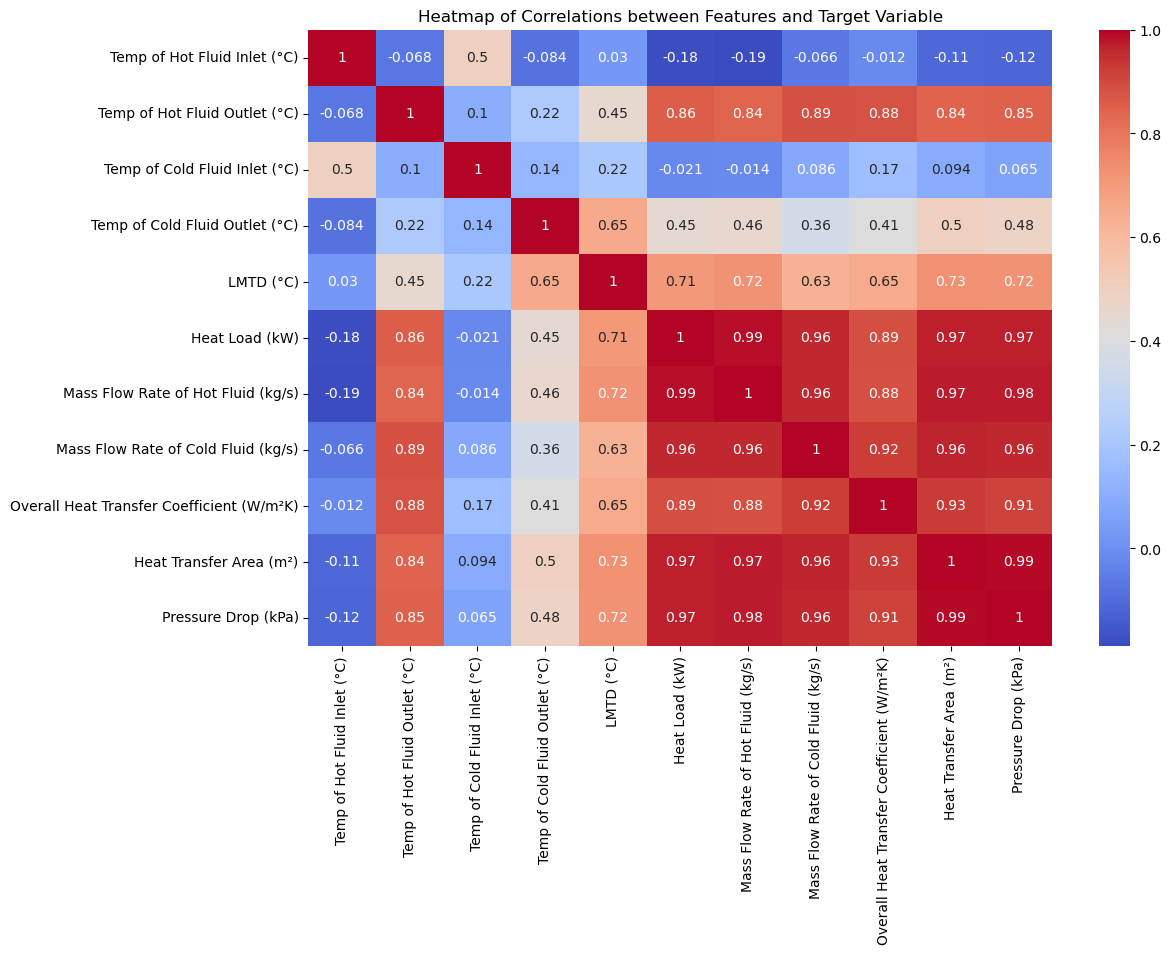

In [6]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]


# Use a heatmap to visualize the correlations between the feature
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations between Features and Target Variable')
plt.show()

In [7]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

selector = SelectKBest(score_func=f_regression, k=4)
X_new = selector.fit_transform(x, y)
selected_features = x.columns[selector.get_support(indices=True)]
print(selected_features)

Index(['Heat Load (kW)', 'Mass Flow Rate of Hot Fluid (kg/s)',
       'Mass Flow Rate of Cold Fluid (kg/s)', 'Heat Transfer Area (m²)'],
      dtype='object')


C:\Users\soura\AppData\Local\Temp\ipykernel_20212\50849622.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['pressure drop'] = y


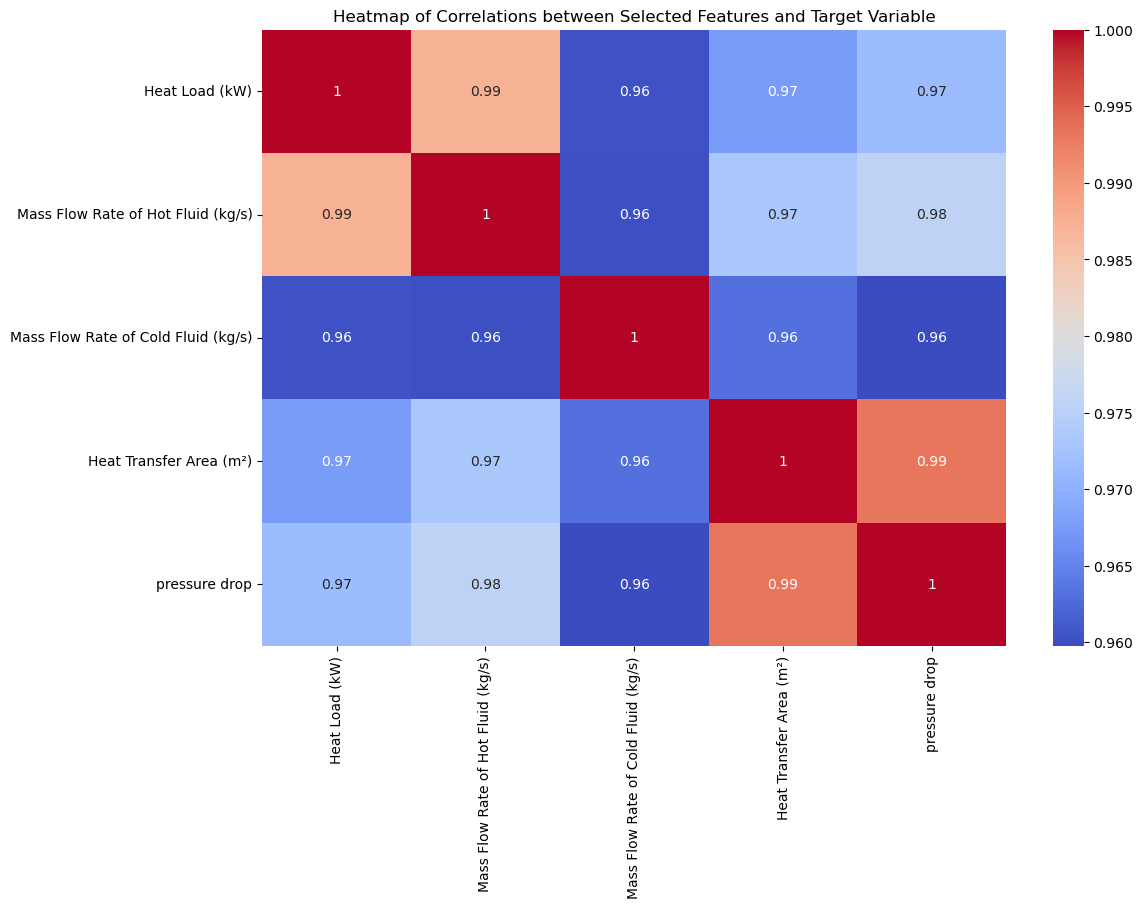

In [8]:
#TO clear that selected variable strongly dependent on pressure drop.
import seaborn as sns

# Create a new DataFrame with the selected features and the target variable
selected_df = x[selected_features]
selected_df['pressure drop'] = y

# Create a heatmap of the correlations between the selected features and the target variable
plt.figure(figsize=(12, 8))
sns.heatmap(selected_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations between Selected Features and Target Variable')
plt.show()

In [9]:
X_new_df = pd.DataFrame(X_new, columns=selected_features)
X_new_df

,Heat Load (kW),Mass Flow Rate of Hot Fluid (kg/s),Mass Flow Rate of Cold Fluid (kg/s),Heat Transfer Area (m²)
0,20.0,0.5,1.0,50.0
1,25.0,0.6,1.2,60.0
2,30.0,0.7,1.5,70.0
3,35.0,0.8,1.8,80.0
4,40.0,0.9,2.0,90.0
...,...,...,...,...
127,34.0,0.6,1.3,55.0
128,11.0,0.2,0.7,25.0
129,49.0,1.1,2.2,85.0
130,63.0,1.4,2.8,130.0


In [10]:
new_data = pd.concat([X_new_df, y], axis=1)
new_data

,Heat Load (kW),Mass Flow Rate of Hot Fluid (kg/s),Mass Flow Rate of Cold Fluid (kg/s),Heat Transfer Area (m²),Pressure Drop (kPa)
0,20.0,0.5,1.0,50.0,10
1,25.0,0.6,1.2,60.0,12
2,30.0,0.7,1.5,70.0,14
3,35.0,0.8,1.8,80.0,16
4,40.0,0.9,2.0,90.0,18
...,...,...,...,...,...
127,34.0,0.6,1.3,55.0,12
128,11.0,0.2,0.7,25.0,5
129,49.0,1.1,2.2,85.0,18
130,63.0,1.4,2.8,130.0,26


In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)


# LINEAR REGRESSION

In [33]:
# Build a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = lin_reg.predict(X_test)
pred_data1 = pd.concat([pd.DataFrame(X_test, columns=selected_features), pd.DataFrame(y_test.values, columns=['Actual Pressure Drop']), pd.DataFrame(y_pred, columns=['Predicted Pressure Drop'])], axis=1)
# Print the predicted values along with the corresponding features
pred_data1

,Heat Load (kW),Mass Flow Rate of Hot Fluid (kg/s),Mass Flow Rate of Cold Fluid (kg/s),Heat Transfer Area (m²),Actual Pressure Drop,Predicted Pressure Drop
0,34.0,0.60,1.4,70.0,15,14.223189
1,12.0,0.30,0.9,25.0,5,5.356333
2,55.0,1.20,2.9,115.0,23,23.371373
3,60.0,1.30,3.0,110.0,22,22.821351
4,22.0,0.50,1.1,50.0,10,10.319897
5,29.0,0.80,1.6,60.0,12,12.717637
6,12.0,0.20,0.8,30.0,6,6.041524
7,54.0,1.20,2.5,100.0,21,20.879795
8,62.0,1.30,3.3,120.0,28,24.507270
9,21.0,0.30,1.0,40.0,8,8.164791


In [4]:
# Calculate the mean squared error
mse_lin = mean_squared_error(y_test, y_pred)
print("Mean Squared Error of Linear Regression: {:.3f}".format(mse_lin))


NameError: name 'y_test' is not defined

In [50]:
# Calculate the R-squared value
from sklearn.metrics import r2_score

# Assuming y_test and y_pred have been defined
r2 = r2_score(y_test, y_pred)
print('R-squared value for Linar Regression:', r2)

R-squared value for Linar Regression: 0.983616124683608


# LASSO REGRESSION

In [15]:
# define the Lasso regression model
lasso = Lasso()

# define the grid of hyperparameters to search over
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

# perform grid search to find the best hyperparameters
grid_search = GridSearchCV(lasso, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# make predictions on the testing data using the best model
y_pred = grid_search.predict(X_test)

# evaluate the model
score = grid_search.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Best alpha: {grid_search.best_params_['alpha']}")
print(f"R-squared score: {score:.2f}")
print(f"Mean squared error: {mse:.2f}")

Best alpha: 0.1
R-squared score: 0.98
Mean squared error: 0.53


In [19]:
# Build a Lasso regression model
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)


Lasso(alpha=0.1)

In [32]:
y_pred =lasso_reg.predict(X_test)
pred_data2 = pd.concat([pd.DataFrame(X_test, columns=selected_features), pd.DataFrame(y_test.values, columns=['Actual Pressure Drop']), pd.DataFrame(y_pred, columns=['Predicted Pressure Drop'])], axis=1)
# Print the predicted values along with the corresponding features
pred_data2

,Heat Load (kW),Mass Flow Rate of Hot Fluid (kg/s),Mass Flow Rate of Cold Fluid (kg/s),Heat Transfer Area (m²),Actual Pressure Drop,Predicted Pressure Drop
0,34.0,0.60,1.4,70.0,15,14.440623
1,12.0,0.30,0.9,25.0,5,5.356075
2,55.0,1.20,2.9,115.0,23,23.474557
3,60.0,1.30,3.0,110.0,22,22.841948
4,22.0,0.50,1.1,50.0,10,10.290573
5,29.0,0.80,1.6,60.0,12,12.416211
6,12.0,0.20,0.8,30.0,6,6.241749
7,54.0,1.20,2.5,100.0,21,20.766923
8,62.0,1.30,3.3,120.0,28,24.714521
9,21.0,0.30,1.0,40.0,8,8.468613


In [49]:
# Calculate the mean squared error
mse_lin = mean_squared_error(y_test, y_pred)
print("Mean Squared Error of Lasso Regression: {:.3f}".format(mse_lin))
# Assuming y_test and y_pred have been defined
r2 = r2_score(y_test, y_pred)
print('R-squared value:', r2)

Mean Squared Error of Lasso Regression: 0.554
R-squared value: 0.983616124683608


# Dicision tree

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the range of hyperparameters to tune
hyperparameters = {'max_depth': [3, 5, 7, 9]}

# Create a decision tree regressor
dt_regressor = DecisionTreeRegressor()

# Create a grid search object with cross-validation
grid_search = GridSearchCV(dt_regressor, hyperparameters, cv=5, scoring='r2')

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print('Best hyperparameters:', grid_search.best_params_)


Best hyperparameters: {'max_depth': 7}


In [31]:
# Create a decision tree regressor with a maximum depth of 5
dt_regressor = DecisionTreeRegressor(max_depth=7)

# Fit the model to the training data
dt_regressor.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = dt_regressor.predict(X_test)
pred_data3 = pd.concat([pd.DataFrame(X_test, columns=selected_features), pd.DataFrame(y_test.values, columns=['Actual Pressure Drop']), pd.DataFrame(y_pred, columns=['Predicted Pressure Drop'])], axis=1)
pred_data3

,Heat Load (kW),Mass Flow Rate of Hot Fluid (kg/s),Mass Flow Rate of Cold Fluid (kg/s),Heat Transfer Area (m²),Actual Pressure Drop,Predicted Pressure Drop
0,34.0,0.60,1.4,70.0,15,14.0
1,12.0,0.30,0.9,25.0,5,6.0
2,55.0,1.20,2.9,115.0,23,22.0
3,60.0,1.30,3.0,110.0,22,24.0
4,22.0,0.50,1.1,50.0,10,10.0
5,29.0,0.80,1.6,60.0,12,13.0
6,12.0,0.20,0.8,30.0,6,6.0
7,54.0,1.20,2.5,100.0,21,21.0
8,62.0,1.30,3.3,120.0,28,24.0
9,21.0,0.30,1.0,40.0,8,8.0


In [48]:
# Calculate the mean squared error
mse_lin = mean_squared_error(y_test, y_pred)
print("Mean Squared Error of Dicision Tree: {:.3f}".format(mse_lin))
# Assuming y_test and y_pred have been defined
r2 = r2_score(y_test, y_pred)
print('R-squared value:', r2)

Mean Squared Error of Dicision Tree: 0.554
R-squared value: 0.983616124683608


# Linear regression is best model among 3 model used so we use that data for logistic regression.


In [34]:
pred_data1

,Heat Load (kW),Mass Flow Rate of Hot Fluid (kg/s),Mass Flow Rate of Cold Fluid (kg/s),Heat Transfer Area (m²),Actual Pressure Drop,Predicted Pressure Drop
0,34.0,0.60,1.4,70.0,15,14.223189
1,12.0,0.30,0.9,25.0,5,5.356333
2,55.0,1.20,2.9,115.0,23,23.371373
3,60.0,1.30,3.0,110.0,22,22.821351
4,22.0,0.50,1.1,50.0,10,10.319897
5,29.0,0.80,1.6,60.0,12,12.717637
6,12.0,0.20,0.8,30.0,6,6.041524
7,54.0,1.20,2.5,100.0,21,20.879795
8,62.0,1.30,3.3,120.0,28,24.507270
9,21.0,0.30,1.0,40.0,8,8.164791


In [40]:
# Select specific columns
columns_to_select = ['Actual Pressure Drop', 'Predicted Pressure Drop']
selected_data =pred_data1[columns_to_select]

# Show the selected columns
print(selected_data.head())

   Actual Pressure Drop  Predicted Pressure Drop
0                    15                14.223189
1                     5                 5.356333
2                    23                23.371373
3                    22                22.821351
4                    10                10.319897


In [44]:
# Define the function to apply the condition
def convert_pressure(pressure):
    if pressure >= 10:
        return 0
    else:
        return 1
# 0= we cant oprate our haet exchanger ,1= we can oprate our heat excanger by apply given conditions.
# Apply the function to the 'Actual Pressure Drop' column and create a new column 'Actual Pressure Status'
pred_data1['Actual Pressure Status'] = pred_data1['Actual Pressure Drop'].apply(convert_pressure)

# Apply the function to the 'Predicted Pressure Drop' column and create a new column 'Predicted Pressure Status'
pred_data1['Predicted Pressure Status'] = pred_data1['Predicted Pressure Drop'].apply(convert_pressure)

# Display the resulting table
(pred_data1[['Actual Pressure Drop', 'Actual Pressure Status', 'Predicted Pressure Drop', 'Predicted Pressure Status']])

,Actual Pressure Drop,Actual Pressure Status,Predicted Pressure Drop,Predicted Pressure Status
0,15,0,14.223189,0
1,5,1,5.356333,1
2,23,0,23.371373,0
3,22,0,22.821351,0
4,10,0,10.319897,0
5,12,0,12.717637,0
6,6,1,6.041524,1
7,21,0,20.879795,0
8,28,0,24.507270,0
9,8,1,8.164791,1


In [46]:
# Extract actual and predicted pressure status
actual_status = pred_data1['Actual Pressure Status'].values
predicted_status = pred_data1['Predicted Pressure Status'].values

# Generate confusion matrix
conf_matrix = confusion_matrix(actual_status, predicted_status)

# Print confusion matrix
print('Confusion Matrix:')
print(conf_matrix)



Confusion Matrix:
[[35  0]
 [ 0  5]]


In [ ]:
#Above matrix provide us result that our regression model and logistic regression provide perfect model that we use and 
#were at given condition we oprate heat exchanger or not.